* Colab jupyter notebook끼리 import하기 위한 선언

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥러닝 1

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥러닝 1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os

In [3]:
sys.path.append('/content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥러닝 1/sample')

In [4]:
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥러닝 1/sample']

### 데이터에서 학습한다!
* 학습이란? 훈련데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
* 신경망이 학습할수 있도록 해주는 지표인 **손실함수**
* 이 손실함수의 결과값을 작게 만드는 기법으로 함수의 기울기를 활용한 **경사하강법**

#### 기계학습은 데이터에서 답을 찾고 패턴을 발견하고 이야기를 만듬
* 기계학습은 훈련데이터만 사용하여 최적의 매개변수를 찾은 후 -> 시험 데이터를 사용해 훈련모델을 평가함

### 손실함수
* 신경망 학습에서는 현재의 상태를 하나의 지표로 표현함, 그리고 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색하는 것임

In [24]:
# 정답 값의 신경망 출력이 0.6
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [25]:
# 평균 오차 제곱 합
def mean_squared_error(y, t):
  return 0.5 * np.sum((y-t)**2)

In [28]:
mean_squared_error(y, t)

0.09750000000000003

In [29]:
# 정답 값의 신경망 출력이 0.1
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.7, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [30]:
mean_squared_error(y, t)

0.6625

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


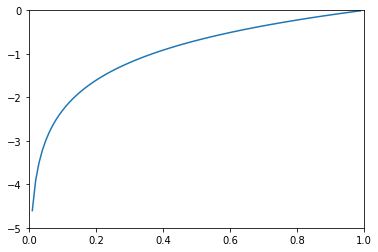

In [37]:
# 크로스 엔트로피 오차
x = np.arange(0.,1,0.01)
y = np.log(x)

plt.xlim(0,1)
plt.ylim(-5,0)
plt.plot(x,y)
plt.show()

In [38]:
def cross_entory_error(y, t):
  delta = 1e-7
  return -np.sum(t*np.log(y + delta))

In [39]:
# 정답 값의 신경망 출력이 0.6
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [40]:
cross_entory_error(y, t)

0.510825457099338

In [41]:
# 정답 값의 신경망 출력이 0.1
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.7, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [42]:
cross_entory_error(y, t)

2.302584092994546

In [ ]:
# 미니배치 처리 : N개의 데이터로 확장해서 정규화

In [43]:
from sample.dataset_py import mnist

In [44]:
(x_train, y_train),(x_test, y_test)=mnist.load_mnist(
    normalize=True, one_hot_label=True)

In [45]:
print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


In [46]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)

In [48]:
x_batch = x_train[batch_mask]
y_batch = y_train[batch_mask]

In [49]:
batch_mask

array([32736, 49092, 25340,  9553,  7695, 15218, 51503, 51517,  8273,
       10342])

In [ ]:
# 배치용 교차 크로스 엔트로피 오차
def cross_entory_error(y, t):
  if y.dim ==1:
    y = y.reshape(1, y.size)
    t = t.reshape(1, t.size)
  
  batch_size = y.shape[0]
  return -np.sum(t*np.log(y + 1e-7))

In [ ]:
# 배치용 교차 크로스 엔트로피 오차
def cross_entory_error(y, t):
  if y.dim ==1:
    y = y.reshape(1, y.size)
    t = t.reshape(1, t.size)
  
  batch_size = y.shape[0]
  return -np.sum(t*np.log(y[np.arange(batch_size), t] + 1e-7))

#### 왜 손실 함수를 설정하는가?
* 정확도를 나두고 손실함수의 값을 선택하는 이유 ->
* 신경망 학습에서는 최적의 매개변수를 탐색할때 손실값의 값ㅇ를 가능한 ㅈ가게 하는 매개변수 값을 찾음
* 이때 매개변수의 미분(기울기)를 계산하고, 그 미분값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복
* 미분 : 가중치 매개변수가 아주 조금 변화했을때 손실함수가 어떻게 변하나
* 미분값이 음 => 가중치매개변수를 음으로
* 미분값이 양 => 가중치매개변수를 양으로
* 정확도를 지표로하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문( 손실함은 연속적으로 변화하는 반면 정확도는 한순간에 바뀌기 때문 (step function을 사용하지 않는 이유))
* 시그모이드를 미분하면 기울기도 연속적으로 변함, 또 0이 되지않음
* 기울기가 0이 되지 않는 덕분에 올바른 학습이 가능함

### 수치 미분
* 아주 작은 차분으로 미분하는 것

In [73]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h) - f(x-h))/ (2*h)

In [79]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

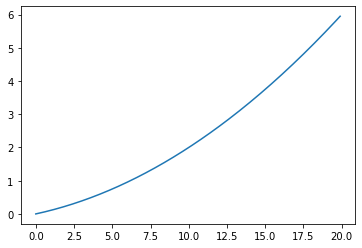

In [80]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.plot(x, y)
plt.show()

In [81]:
# 편미분
def function_2(x):
  return x[0]**2 + x[1]**2

In [83]:
#문제, f(x0, x1) = x0**2 + x1**2
# x0=3, x1=4일 때, x0에 대한 편미분을 구하라
def function_tmp1(x0):
  return x0*x0 + 4.0**2

In [84]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [85]:
numerical_diff(function_tmp1, 4.0)

7.999999999999119

In [173]:
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x)
  
  for idx in range(x.size):
    tmp_val = x[idx]

    # f(x+h)
    x[idx] = tmp_val + h
    fxh1 = f(x)

    #f(x-h)
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val
    print(grad)
  return grad

In [174]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

[3. 4.]
[3.0001 4.    ]
[2.9999 4.    ]
[6. 0.]
[3. 4.]
[3.     4.0001]
[3.     3.9999]
[6. 8.]


array([6., 8.])

In [91]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [92]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

### 경사하강법
* 기계학습 문제 대부분은 학습단계에서 최적의 매개변수를 찾아냄
* 여기서 최적이란, 손실함수가 최솟값이 될 때의 매개변수 값입니다.
* 매개변수 공간은 광대해서 어디가 최솟값인지를 짐작할 수 없기에, 기울기를 이용해 함수의 최솟값을 찾으려는 것이 경사법임
* 경사법은 현위치에서 기울어진 방향으로 일정거리만큼 이동하고, 이를 반복하는 것
* 학습률 : 한번의 학습을 얼마만큼 학습해야 할지 / 매개변수 값을 얼마나 갱신하느냐를 정하는 것
* 

In [113]:
def gradinet_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f,x)
    x -= lr * grad
  return x

In [114]:
def function_2(x):
  return x[0]**2 + x[1]**2

In [115]:
init_x = np.array([-3.0, 4.0])

In [116]:
gradinet_descent(f=function_2, init_x=init_x, lr=0.01, step_num=100)

array([-0.39785867,  0.53047822])

In [151]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [152]:
class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2,3)
  
  def predict(self, x):
    return np.dot(x, self.W)
  
  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)

    loss = cross_entropy_error(y, t)
    return loss

In [153]:
net = simpleNet()

In [154]:
print(net.W)

[[-0.07232622  0.44894071  1.15464663]
 [ 0.60162953 -0.06523854  2.41908824]]


In [155]:
x = np.array([0.6, 0.9])
p = net.predict(x)

In [156]:
softmax(p)

array([0.080206 , 0.0601702, 0.8596238])

In [157]:
p.argmax()

2

In [158]:
t = np.array([0, 0, 1])

In [159]:
net.loss(x, t)

0.1512603084643982

In [160]:
def f(W):
  return net.loss(x,t)

In [163]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.04812359  0.03610212 -0.08422571]
 [ 0.07218539  0.05415317 -0.12633856]]


In [164]:
net.W

array([[-0.07232622,  0.44894071,  1.15464663],
       [ 0.60162953, -0.06523854,  2.41908824]])

In [175]:
from common.functions import *
from common.gradient import numerical_gradient

In [192]:
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size,
               weight_init_std=0.01):
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)

    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)

    self.params['b2'] = np.zeros(output_size)

  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)
    return y
  
  def loss(self, x, t):
    y = self.predict(x)

    return cross_entropy_error(y,t)
  
  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y==t) / float(x.shape[0])
    return accuracy
  
  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x,t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

In [193]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

In [194]:
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [195]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [196]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

In [197]:
grads = net.numerical_gradient(x, t) # 기울기 계산
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [11]:
#미니배치 학습 구현
import numpy as np
from sample.dataset_py import mnist
from sample.ch04.two_layer_net import TwoLayerNet

In [8]:
(x_train, y_train),(x_test, y_test)=mnist.load_mnist(
    normalize=True, one_hot_label=True)

In [9]:
train_loss_list = []

In [10]:
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

In [14]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [ ]:
for i in range(100): 
  # 미니배치 계산
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = y_train[batch_mask]

  # 기울기 계산
  grad = network.numerical_gradient(x_batch, t_batch)

  # 매개변수 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]
  
  # 학습 기록
  loss = network.loss(x_batch, t_batch)
  print("Loss : {}".format(loss))
  train_loss_list.append(loss)

In [ ]:
(x_train, y_train),(x_test, y_test)=mnist.load_mnist(
    normalize=True, one_hot_label=True)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size/ batch_size, 1)

for i in range(100): 
  # 미니배치 계산
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = y_train[batch_mask]

  # 기울기 계산
  grad = network.numerical_gradient(x_batch, t_batch)

  # 매개변수 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]
  
  # 학습 기록
  loss = network.loss(x_batch, t_batch)
  print("Loss : {}".format(loss))
  train_loss_list.append(loss)

  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, y_train)
    test_acc = network.accuracy(x_test, y_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc, test acc | {}, {}".format(train_acc, test_acc))

* 신경망이 학습을 수행할 수 있도록 손실함수 지표를 도입함.
* 신경망 학습은 손실함수를 지표로 손실함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신함
* 가중치 매개변수를 갱신할때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신한다.
* 아주작은 값을 주었을때의 차분으로 미분하는 것을 수치 미분이라고 한다.
* 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.
* 수치 미분을 이용한 계산에는 시간이 걸리지만, 그 구현은 간단하다. 하지만 오차역전파법은 기울기를 고속으로 구할 수 있다.